# Bertrand Competition: Price Competition in Oligopoly

## Introduction

The Bertrand model represents a different type of oligopoly competition where firms compete by setting **prices** rather than quantities. This model leads to dramatically different outcomes compared to Cournot competition, often resulting in prices equal to marginal cost even with just two firms.

## Key Concepts

- **Price Competition**: Firms simultaneously choose prices
- **Product Homogeneity**: Consumers buy from the lowest-priced firm
- **Bertrand Paradox**: Even with 2 firms, prices equal marginal cost
- **Market Power**: Firms have no market power in the Bertrand model


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up plotting style with Rose Pine Dawn theme (light background)
plt.style.use('rose-pine-dawn')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Bertrand Model Setup

Let's define the Bertrand model with:
- **Demand**: Q = a - bP (quantity demanded as function of price)
- **Cost**: C = cq (constant marginal cost)
- **n firms**: Each firm chooses price p_i simultaneously
- **Consumer behavior**: All consumers buy from the firm with the lowest price


In [27]:
# Model parameters
a = 100  # Demand intercept (when P = 0, Q = 100)
b = 1    # Demand slope
c = 10   # Marginal cost

print(f"Demand function: Q = {a} - {b}P")
print(f"Marginal cost: c = {c}")
print(f"Competitive price (P = MC): {c}")
print(f"Competitive quantity: {a - b * c}")

# For comparison with Cournot
print(f"\nFor comparison with Cournot model:")
print(f"If we had P = {a} - Q (Cournot demand), monopoly price would be {(a + c) / 2}")
print(f"Bertrand duopoly price: {c}")
print(f"Cournot duopoly price: {(a + 2 * c) / 3}")  # Using Cournot formula


Demand function: Q = 100 - 1P
Marginal cost: c = 10
Competitive price (P = MC): 10
Competitive quantity: 90

For comparison with Cournot model:
If we had P = 100 - Q (Cournot demand), monopoly price would be 55.0
Bertrand duopoly price: 10
Cournot duopoly price: 40.0


## 2. Bertrand Nash Equilibrium

In the Bertrand model with n symmetric firms:

- **Nash Equilibrium**: All firms set price equal to marginal cost (p* = c)
- **Individual quantity**: q* = (a - bc) / n (if all firms set same price)
- **Total quantity**: Q* = a - bc (competitive quantity)
- **Individual profit**: π* = 0 (no economic profit)
- **Total profit**: 0

This is the famous **Bertrand Paradox**: even with just 2 firms, the outcome is the same as perfect competition!


In [28]:
def bertrand_equilibrium(n_firms, a, b, c):
    """
    Calculate Bertrand equilibrium for n firms.
    
    Args:
        n_firms: Number of firms
        a, b, c: Demand and cost parameters
    
    Returns:
        Dictionary with equilibrium values
    """
    # In Bertrand equilibrium, all firms set price = marginal cost
    p_star = c
    
    # Total quantity at equilibrium price
    Q_star = a - b * p_star
    
    # Individual quantity (if all firms set same price)
    q_star = Q_star / n_firms if n_firms > 0 else 0
    
    # Individual profit (zero in Bertrand equilibrium)
    pi_star = 0
    
    # Total profit
    total_pi = 0
    
    # Consumer surplus
    CS = 0.5 * (a / b - p_star) * Q_star
    
    # Producer surplus (zero since profits are zero)
    PS = 0
    
    # Total surplus
    TS = CS + PS
    
    # Competitive benchmark (same as Bertrand outcome)
    Q_competitive = a - b * c
    P_competitive = c
    CS_competitive = 0.5 * (a / b - c) * Q_competitive
    TS_competitive = CS_competitive
    
    return {
        'n_firms': n_firms,
        'price': p_star,
        'individual_quantity': q_star,
        'total_quantity': Q_star,
        'individual_profit': pi_star,
        'total_profit': total_pi,
        'consumer_surplus': CS,
        'producer_surplus': PS,
        'total_surplus': TS,
        'competitive_quantity': Q_competitive,
        'competitive_price': P_competitive,
        'competitive_consumer_surplus': CS_competitive,
        'competitive_total_surplus': TS_competitive,
        'efficiency_ratio': TS / TS_competitive if TS_competitive > 0 else 1,
        'deadweight_loss': 0  # No deadweight loss in Bertrand
    }

# Test with different numbers of firms
firm_counts = [1, 2, 3, 4, 5, 10, 20, 50, 100]
results = []

for n in firm_counts:
    result = bertrand_equilibrium(n, a, b, c)
    results.append(result)

# Create DataFrame for analysis
df = pd.DataFrame(results)
print("Bertrand Equilibrium Results:")
print(df[['n_firms', 'price', 'total_quantity', 'individual_quantity', 'individual_profit', 'efficiency_ratio']].round(2))


Bertrand Equilibrium Results:
   n_firms  price  total_quantity  individual_quantity  individual_profit  \
0        1     10              90                 90.0                  0   
1        2     10              90                 45.0                  0   
2        3     10              90                 30.0                  0   
3        4     10              90                 22.5                  0   
4        5     10              90                 18.0                  0   
5       10     10              90                  9.0                  0   
6       20     10              90                  4.5                  0   
7       50     10              90                  1.8                  0   
8      100     10              90                  0.9                  0   

   efficiency_ratio  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
5               1.0  
6               1.0  
7               1.0  
8

## 3. Bertrand vs Cournot Comparison

Let's compare the Bertrand and Cournot models to see the dramatic difference in outcomes:


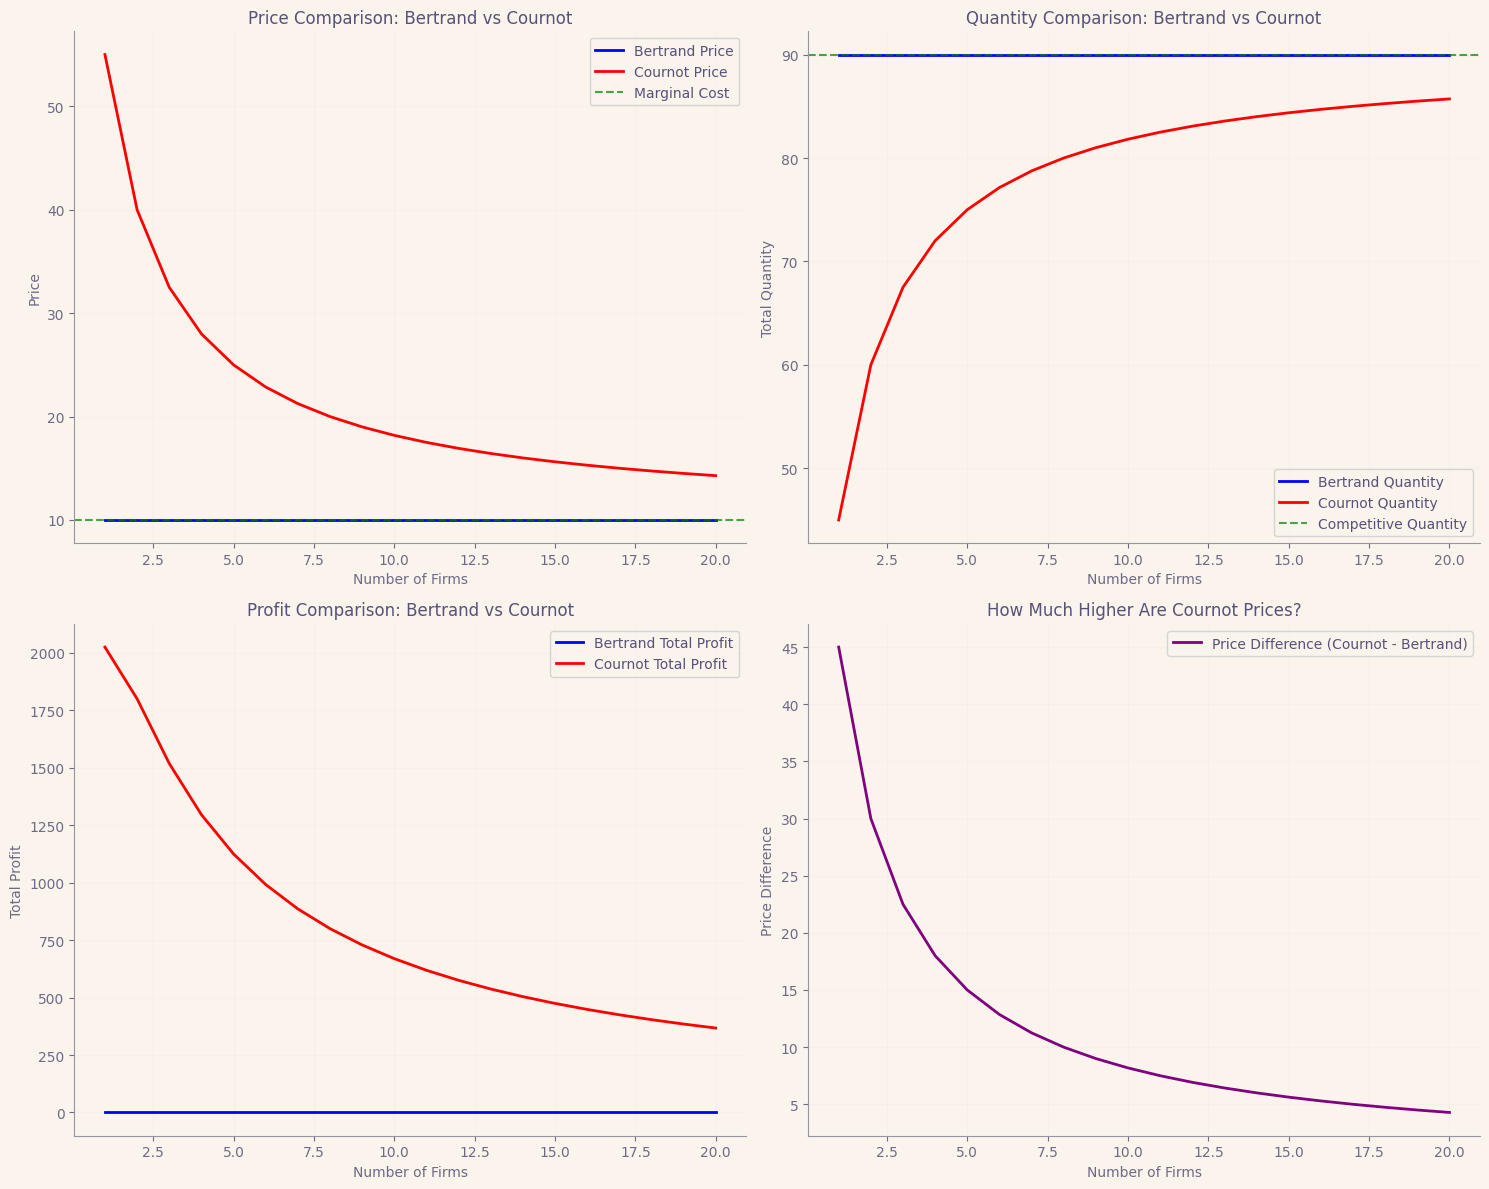

=== KEY COMPARISONS ===
Duopoly (2 firms):
  Bertrand: Price = 10.00, Quantity = 90.00, Profit = 0.00
  Cournot:  Price = 40.00, Quantity = 60.00, Profit = 1800.00
  Difference: Price 30.00 higher in Cournot

10 firms:
  Bertrand: Price = 10.00, Quantity = 90.00, Profit = 0.00
  Cournot:  Price = 18.18, Quantity = 81.82, Profit = 669.42
  Difference: Price 8.18 higher in Cournot


In [29]:
def cournot_equilibrium(n_firms, a, b, c):
    """Calculate Cournot equilibrium for comparison."""
    # Individual quantity
    q_star = (a - c) / (b * (n_firms + 1))
    
    # Total quantity
    Q_star = n_firms * q_star
    
    # Market price
    P_star = (a + n_firms * c) / (n_firms + 1)
    
    # Individual profit
    pi_star = (a - c)**2 / (b * (n_firms + 1)**2)
    
    # Total profit
    total_pi = n_firms * pi_star
    
    # Consumer surplus
    CS = 0.5 * (a - P_star) * Q_star
    
    # Producer surplus
    PS = total_pi
    
    # Total surplus
    TS = CS + PS
    
    # Competitive benchmark
    Q_competitive = a - b * c
    P_competitive = c
    CS_competitive = 0.5 * (a - c) * Q_competitive
    TS_competitive = CS_competitive
    
    return {
        'n_firms': n_firms,
        'price': P_star,
        'total_quantity': Q_star,
        'individual_quantity': q_star,
        'individual_profit': pi_star,
        'total_profit': total_pi,
        'consumer_surplus': CS,
        'producer_surplus': PS,
        'total_surplus': TS,
        'competitive_quantity': Q_competitive,
        'competitive_price': P_competitive,
        'competitive_consumer_surplus': CS_competitive,
        'competitive_total_surplus': TS_competitive,
        'efficiency_ratio': TS / TS_competitive if TS_competitive > 0 else 1,
        'deadweight_loss': TS_competitive - TS
    }

# Calculate both models for comparison
n_range = np.arange(1, 21)  # 1 to 20 firms
bertrand_prices = []
bertrand_quantities = []
bertrand_profits = []
cournot_prices = []
cournot_quantities = []
cournot_profits = []

for n in n_range:
    # Bertrand results
    bertrand_result = bertrand_equilibrium(n, a, b, c)
    bertrand_prices.append(bertrand_result['price'])
    bertrand_quantities.append(bertrand_result['total_quantity'])
    bertrand_profits.append(bertrand_result['total_profit'])
    
    # Cournot results
    cournot_result = cournot_equilibrium(n, a, b, c)
    cournot_prices.append(cournot_result['price'])
    cournot_quantities.append(cournot_result['total_quantity'])
    cournot_profits.append(cournot_result['total_profit'])

# Create comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price comparison
axes[0, 0].plot(n_range, bertrand_prices, 'b-', linewidth=2, label='Bertrand Price')
axes[0, 0].plot(n_range, cournot_prices, 'r-', linewidth=2, label='Cournot Price')
axes[0, 0].axhline(y=c, color='g', linestyle='--', alpha=0.7, label='Marginal Cost')
axes[0, 0].set_xlabel('Number of Firms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price Comparison: Bertrand vs Cournot')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Quantity comparison
axes[0, 1].plot(n_range, bertrand_quantities, 'b-', linewidth=2, label='Bertrand Quantity')
axes[0, 1].plot(n_range, cournot_quantities, 'r-', linewidth=2, label='Cournot Quantity')
axes[0, 1].axhline(y=a - b * c, color='g', linestyle='--', alpha=0.7, label='Competitive Quantity')
axes[0, 1].set_xlabel('Number of Firms')
axes[0, 1].set_ylabel('Total Quantity')
axes[0, 1].set_title('Quantity Comparison: Bertrand vs Cournot')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Profit comparison
axes[1, 0].plot(n_range, bertrand_profits, 'b-', linewidth=2, label='Bertrand Total Profit')
axes[1, 0].plot(n_range, cournot_profits, 'r-', linewidth=2, label='Cournot Total Profit')
axes[1, 0].set_xlabel('Number of Firms')
axes[1, 0].set_ylabel('Total Profit')
axes[1, 0].set_title('Profit Comparison: Bertrand vs Cournot')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Price difference
price_diff = np.array(cournot_prices) - np.array(bertrand_prices)
axes[1, 1].plot(n_range, price_diff, 'purple', linewidth=2, label='Price Difference (Cournot - Bertrand)')
axes[1, 1].set_xlabel('Number of Firms')
axes[1, 1].set_ylabel('Price Difference')
axes[1, 1].set_title('How Much Higher Are Cournot Prices?')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== KEY COMPARISONS ===")
print(f"Duopoly (2 firms):")
print(f"  Bertrand: Price = {bertrand_prices[1]:.2f}, Quantity = {bertrand_quantities[1]:.2f}, Profit = {bertrand_profits[1]:.2f}")
print(f"  Cournot:  Price = {cournot_prices[1]:.2f}, Quantity = {cournot_quantities[1]:.2f}, Profit = {cournot_profits[1]:.2f}")
print(f"  Difference: Price {cournot_prices[1] - bertrand_prices[1]:.2f} higher in Cournot")

print(f"\n10 firms:")
print(f"  Bertrand: Price = {bertrand_prices[9]:.2f}, Quantity = {bertrand_quantities[9]:.2f}, Profit = {bertrand_profits[9]:.2f}")
print(f"  Cournot:  Price = {cournot_prices[9]:.2f}, Quantity = {cournot_quantities[9]:.2f}, Profit = {cournot_profits[9]:.2f}")
print(f"  Difference: Price {cournot_prices[9] - bertrand_prices[9]:.2f} higher in Cournot")


## 4. The Bertrand Paradox Explained

Let's visualize why the Bertrand Paradox occurs by showing the best response functions and profit landscapes:


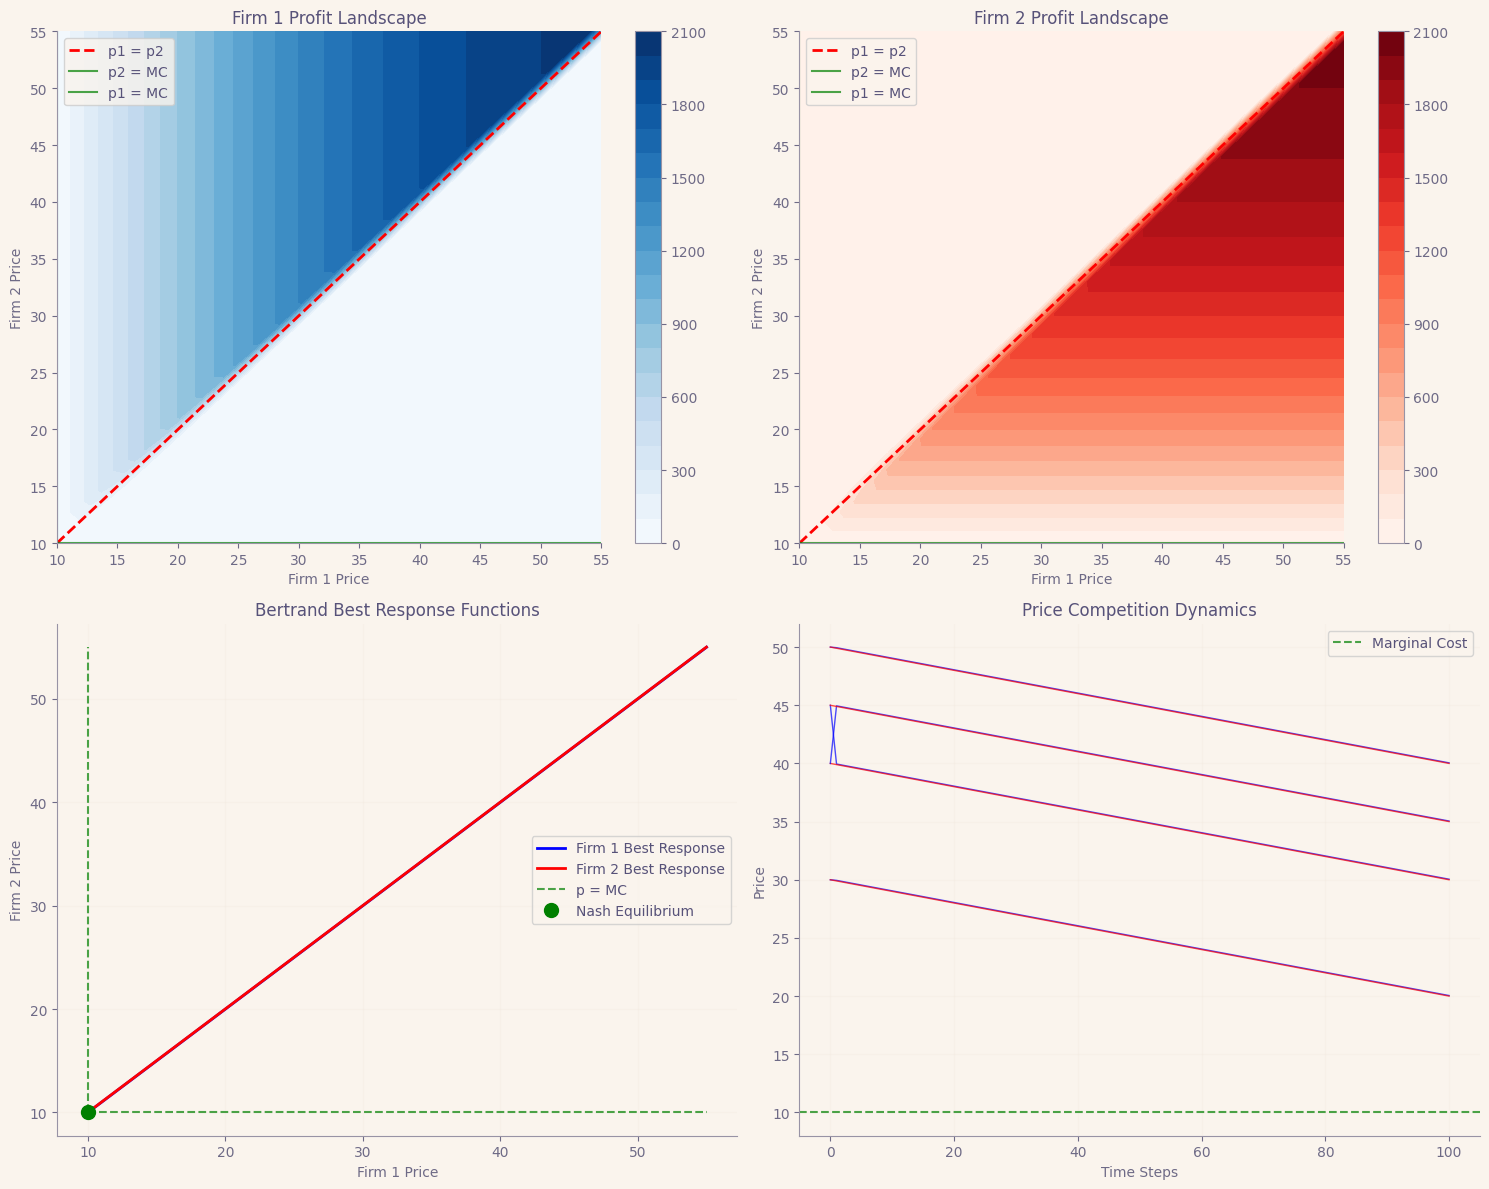

=== THE BERTRAND PARADOX EXPLAINED ===
1. Both firms want to undercut each other to capture the entire market
2. This leads to a 'race to the bottom' in prices
3. The only stable outcome is when both firms set price = marginal cost
4. At this point, neither firm has an incentive to deviate
5. Result: Perfect competition outcome with just 2 firms!


In [ ]:
# Visualize the Bertrand Paradox with a 2-firm example
def firm1_profit(p1, p2, a, b, c):
    """Calculate Firm 1's profit given both prices."""
    if p1 < p2:
        # Firm 1 gets all demand
        quantity = a - b * p1
        return (p1 - c) * quantity
    elif p1 == p2:
        # Split demand equally
        quantity = (a - b * p1) / 2
        return (p1 - c) * quantity
    else:
        # Firm 1 gets no demand
        return 0

def firm2_profit(p1, p2, a, b, c):
    """Calculate Firm 2's profit given both prices."""
    if p2 < p1:
        # Firm 2 gets all demand
        quantity = a - b * p2
        return (p2 - c) * quantity
    elif p1 == p2:
        # Split demand equally
        quantity = (a - b * p2) / 2
        return (p2 - c) * quantity
    else:
        # Firm 2 gets no demand
        return 0

# Create price grids for visualization
p_range = np.linspace(c, (a + c) / 2, 50)
P1, P2 = np.meshgrid(p_range, p_range)

# Calculate profit matrices
Profit1 = np.zeros_like(P1)
Profit2 = np.zeros_like(P2)

for i in range(len(p_range)):
    for j in range(len(p_range)):
        Profit1[i, j] = firm1_profit(p_range[j], p_range[i], a, b, c)
        Profit2[i, j] = firm2_profit(p_range[j], p_range[i], a, b, c)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Firm 1's profit landscape
im1 = axes[0, 0].contourf(P1, P2, Profit1, levels=20, cmap='Blues')
axes[0, 0].plot(p_range, p_range, 'r--', linewidth=2, label='p1 = p2')
axes[0, 0].axhline(y=c, color='g', linestyle='-', alpha=0.7, label='p2 = MC')
axes[0, 0].axvline(x=c, color='g', linestyle='-', alpha=0.7, label='p1 = MC')
axes[0, 0].set_xlabel('Firm 1 Price')
axes[0, 0].set_ylabel('Firm 2 Price')
axes[0, 0].set_title('Firm 1 Profit Landscape')
axes[0, 0].legend()
plt.colorbar(im1, ax=axes[0, 0])

# Firm 2's profit landscape
im2 = axes[0, 1].contourf(P1, P2, Profit2, levels=20, cmap='Reds')
axes[0, 1].plot(p_range, p_range, 'r--', linewidth=2, label='p1 = p2')
axes[0, 1].axhline(y=c, color='g', linestyle='-', alpha=0.7, label='p2 = MC')
axes[0, 1].axvline(x=c, color='g', linestyle='-', alpha=0.7, label='p1 = MC')
axes[0, 1].set_xlabel('Firm 1 Price')
axes[0, 1].set_ylabel('Firm 2 Price')
axes[0, 1].set_title('Firm 2 Profit Landscape')
axes[0, 1].legend()
plt.colorbar(im2, ax=axes[0, 1])

# Best response functions
def firm1_best_response(p2, a, b, c):
    """Firm 1's best response to Firm 2's price."""
    if p2 > c:
        return p2 - 0.01  # Undercut by small amount
    else:
        return c

def firm2_best_response(p1, a, b, c):
    """Firm 2's best response to Firm 1's price."""
    if p1 > c:
        return p1 - 0.01  # Undercut by small amount
    else:
        return c

# Calculate best response curves
br1_prices = []
br2_prices = []
for p in p_range:
    br1_prices.append(firm1_best_response(p, a, b, c))
    br2_prices.append(firm2_best_response(p, a, b, c))

axes[1, 0].plot(p_range, br1_prices, 'b-', linewidth=2, label='Firm 1 Best Response')
axes[1, 0].plot(br2_prices, p_range, 'r-', linewidth=2, label='Firm 2 Best Response')
axes[1, 0].plot([c, c], [c, (a + c) / 2], 'g--', alpha=0.7, label='p = MC')
axes[1, 0].plot([c, (a + c) / 2], [c, c], 'g--', alpha=0.7)
axes[1, 0].plot(c, c, 'go', markersize=10, label='Nash Equilibrium')
axes[1, 0].set_xlabel('Firm 1 Price')
axes[1, 0].set_ylabel('Firm 2 Price')
axes[1, 0].set_title('Bertrand Best Response Functions')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Price dynamics simulation
def simulate_price_dynamics(initial_prices, n_steps=1000):
    """Simulate price competition dynamics."""
    p1_history = [initial_prices[0]]
    p2_history = [initial_prices[1]]
    
    p1, p2 = initial_prices
    for step in range(n_steps):
        # Firms undercut each other
        new_p1 = max(c, p2 - 0.05)  # Smaller undercutting step for smoother convergence
        new_p2 = max(c, new_p1 - 0.05)  # Smaller undercutting step for smoother convergence
        
        p1, p2 = new_p1, new_p2
        p1_history.append(p1)
        p2_history.append(p2)
        
        # Stop if both reach marginal cost
        if p1 == c and p2 == c:
            break
    
    return p1_history, p2_history

# Simulate from different starting points
initial_conditions = [
    [50, 50],  # Both start high
    [45, 40],  # Firm 2 starts lower
    [40, 45],  # Firm 1 starts lower
    [30, 30],  # Both start moderate
]

for i, initial in enumerate(initial_conditions):
    p1_hist, p2_hist = simulate_price_dynamics(initial)
    steps = range(len(p1_hist))
    axes[1, 1].plot(steps, p1_hist, 'b-', alpha=0.7, linewidth=1)
    axes[1, 1].plot(steps, p2_hist, 'r-', alpha=0.7, linewidth=1)

axes[1, 1].axhline(y=c, color='g', linestyle='--', alpha=0.7, label='Marginal Cost')
axes[1, 1].set_xlabel('Time Steps')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Price Competition Dynamics')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== THE BERTRAND PARADOX EXPLAINED ===")
print("1. Both firms want to undercut each other to capture the entire market")
print("2. This leads to a 'race to the bottom' in prices")
print("3. The only stable outcome is when both firms set price = marginal cost")
print("4. At this point, neither firm has an incentive to deviate")
print("5. Result: Perfect competition outcome with just 2 firms!")


## 5. Welfare Analysis

Let's analyze the welfare implications of Bertrand competition:


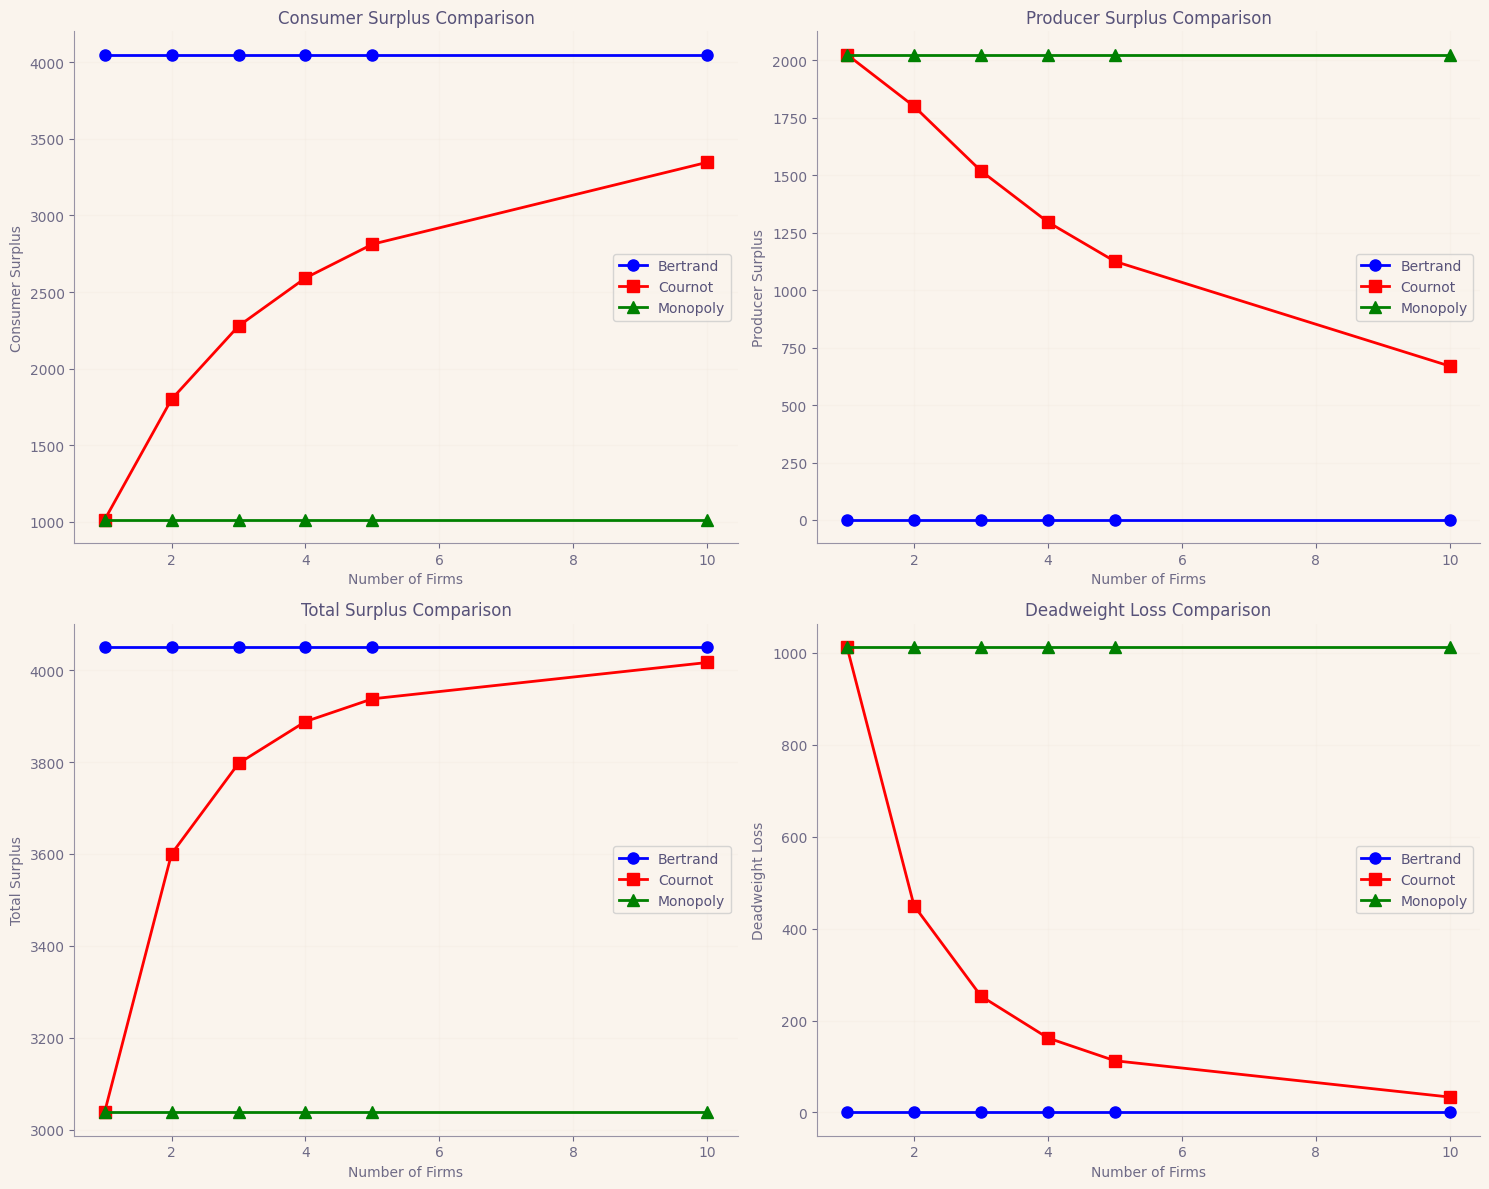

=== WELFARE ANALYSIS SUMMARY ===
With 2 firms:
  Bertrand: CS = 4050, PS = 0, TS = 4050, DWL = 0
  Cournot:  CS = 1800, PS = 1800, TS = 3600, DWL = 450
  Monopoly: CS = 1012, PS = 2025, TS = 3038, DWL = 1012

Key insights:
• Bertrand competition maximizes consumer surplus
• Bertrand competition eliminates deadweight loss
• Bertrand competition achieves perfect efficiency
• The Bertrand paradox: 2 firms achieve competitive outcomes


In [31]:
# Welfare analysis for different market structures
def welfare_analysis(n_firms, a, b, c):
    """Calculate welfare for different market structures."""
    
    # Bertrand results
    bertrand_result = bertrand_equilibrium(n_firms, a, b, c)
    
    # Cournot results
    cournot_result = cournot_equilibrium(n_firms, a, b, c)
    
    # Monopoly results (n=1 in Cournot)
    monopoly_result = cournot_equilibrium(1, a, b, c)
    
    return {
        'n_firms': n_firms,
        'bertrand': bertrand_result,
        'cournot': cournot_result,
        'monopoly': monopoly_result
    }

# Analyze welfare for different numbers of firms
welfare_results = []
for n in [1, 2, 3, 4, 5, 10]:
    result = welfare_analysis(n, a, b, c)
    welfare_results.append(result)

# Create welfare comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract data for plotting
n_firms_list = [r['n_firms'] for r in welfare_results]
bertrand_cs = [r['bertrand']['consumer_surplus'] for r in welfare_results]
cournot_cs = [r['cournot']['consumer_surplus'] for r in welfare_results]
monopoly_cs = [r['monopoly']['consumer_surplus'] for r in welfare_results]

bertrand_ps = [r['bertrand']['producer_surplus'] for r in welfare_results]
cournot_ps = [r['cournot']['producer_surplus'] for r in welfare_results]
monopoly_ps = [r['monopoly']['producer_surplus'] for r in welfare_results]

bertrand_ts = [r['bertrand']['total_surplus'] for r in welfare_results]
cournot_ts = [r['cournot']['total_surplus'] for r in welfare_results]
monopoly_ts = [r['monopoly']['total_surplus'] for r in welfare_results]

# Consumer surplus comparison
axes[0, 0].plot(n_firms_list, bertrand_cs, 'b-o', linewidth=2, label='Bertrand', markersize=8)
axes[0, 0].plot(n_firms_list, cournot_cs, 'r-s', linewidth=2, label='Cournot', markersize=8)
axes[0, 0].plot(n_firms_list, monopoly_cs, 'g-^', linewidth=2, label='Monopoly', markersize=8)
axes[0, 0].set_xlabel('Number of Firms')
axes[0, 0].set_ylabel('Consumer Surplus')
axes[0, 0].set_title('Consumer Surplus Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Producer surplus comparison
axes[0, 1].plot(n_firms_list, bertrand_ps, 'b-o', linewidth=2, label='Bertrand', markersize=8)
axes[0, 1].plot(n_firms_list, cournot_ps, 'r-s', linewidth=2, label='Cournot', markersize=8)
axes[0, 1].plot(n_firms_list, monopoly_ps, 'g-^', linewidth=2, label='Monopoly', markersize=8)
axes[0, 1].set_xlabel('Number of Firms')
axes[0, 1].set_ylabel('Producer Surplus')
axes[0, 1].set_title('Producer Surplus Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Total surplus comparison
axes[1, 0].plot(n_firms_list, bertrand_ts, 'b-o', linewidth=2, label='Bertrand', markersize=8)
axes[1, 0].plot(n_firms_list, cournot_ts, 'r-s', linewidth=2, label='Cournot', markersize=8)
axes[1, 0].plot(n_firms_list, monopoly_ts, 'g-^', linewidth=2, label='Monopoly', markersize=8)
axes[1, 0].set_xlabel('Number of Firms')
axes[1, 0].set_ylabel('Total Surplus')
axes[1, 0].set_title('Total Surplus Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Deadweight loss
bertrand_dwl = [0] * len(n_firms_list)  # No deadweight loss in Bertrand
cournot_dwl = [r['cournot']['deadweight_loss'] for r in welfare_results]
monopoly_dwl = [r['monopoly']['deadweight_loss'] for r in welfare_results]

axes[1, 1].plot(n_firms_list, bertrand_dwl, 'b-o', linewidth=2, label='Bertrand', markersize=8)
axes[1, 1].plot(n_firms_list, cournot_dwl, 'r-s', linewidth=2, label='Cournot', markersize=8)
axes[1, 1].plot(n_firms_list, monopoly_dwl, 'g-^', linewidth=2, label='Monopoly', markersize=8)
axes[1, 1].set_xlabel('Number of Firms')
axes[1, 1].set_ylabel('Deadweight Loss')
axes[1, 1].set_title('Deadweight Loss Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print welfare summary
print("=== WELFARE ANALYSIS SUMMARY ===")
print(f"With 2 firms:")
print(f"  Bertrand: CS = {bertrand_cs[1]:.0f}, PS = {bertrand_ps[1]:.0f}, TS = {bertrand_ts[1]:.0f}, DWL = 0")
print(f"  Cournot:  CS = {cournot_cs[1]:.0f}, PS = {cournot_ps[1]:.0f}, TS = {cournot_ts[1]:.0f}, DWL = {cournot_dwl[1]:.0f}")
print(f"  Monopoly: CS = {monopoly_cs[1]:.0f}, PS = {monopoly_ps[1]:.0f}, TS = {monopoly_ts[1]:.0f}, DWL = {monopoly_dwl[1]:.0f}")

print(f"\nKey insights:")
print(f"• Bertrand competition maximizes consumer surplus")
print(f"• Bertrand competition eliminates deadweight loss")
print(f"• Bertrand competition achieves perfect efficiency")
print(f"• The Bertrand paradox: 2 firms achieve competitive outcomes")


## Summary

The Bertrand competition model demonstrates several key insights:

### **The Bertrand Paradox**
- Even with just 2 firms, prices equal marginal cost
- This achieves the same outcome as perfect competition
- Firms earn zero economic profit

### **Key Differences from Cournot**
- **Price competition** vs. quantity competition
- **Immediate competitive outcome** vs. gradual convergence
- **No market power** vs. significant market power
- **Perfect efficiency** vs. inefficiency

### **Welfare Implications**
- **Consumer surplus**: Maximized in Bertrand
- **Producer surplus**: Zero in Bertrand (firms earn normal profit)
- **Total surplus**: Maximized in Bertrand
- **Deadweight loss**: Eliminated in Bertrand

### **Real-World Applications**
The Bertrand model helps explain:
- Price wars in competitive industries
- Why some markets have very low margins
- The importance of product differentiation
- Strategic behavior in pricing decisions

### **Limitations**
- Assumes homogeneous products
- Ignores capacity constraints
- Doesn't account for repeated interactions
- May not capture all real-world dynamics

The Bertrand model provides a powerful framework for understanding how price competition can lead to surprisingly competitive outcomes, even with relatively few firms.
